In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# !pip install --upgrade gensim
import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
import time

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# load the data
x = pd.read_csv('data/test.csv')
y = pd.read_csv('data/labels.csv')

C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# make sure data is in the right order
(x['Id'].values != y['Id'].values).sum()

C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [4]:
# both = x['Text'].values
pos = x['Text'].values[y['Score']==5]
neg = x['Text'].values[y['Score']==1]

C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
pos.shape, neg.shape

C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


((90630,), (13075,))

#### there are around 90k positive instances and around 13k negative instances. In order to take the same number of instances for both positive and negative, we will take 13k samples of each

In [6]:
num_instances = 13000

C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
print(pos[0])
print('-------------------')
print(neg[0])

Fog chaser was the best both in flavor and body.  So far this is the only product that the body is compatible to the richer flavor of blew coffee that uses k-cup system.
-------------------
THIS WAS THE WORST TASTING FLAVORING I EVERY USED IN MY BAKING CAREER.  I EVEN LET OTHER PROFESSIONAL BAKER TRY IT AND THEY ALL AGREE ABOUT THE QUALITY OF THE TASTE OF THIS PRODUCT. I REALLY WOULD LIKE TO RECEIVE AN REFUND!!!!!!!!!!!!!!!!!!!


C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
def get_coherence(model):
    coherence_model_lda = CoherenceModel(model=model, texts=corpus, dictionary=dictionary, coherence='c_v')
    return coherence_model_lda.get_coherence()

C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<h1 style="text-align: center; padding: 10px; border-bottom: 3px dashed black; border-top: 3px dashed black">POSITIVE</h1>

In [9]:
all_models = {}
coherences = []

C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
stemmer = PorterStemmer()
corpus = []
for sent in pos[:num_instances]:
    # tokenize
    
    sent = nltk.word_tokenize(re.sub('[^a-zA-Z]',' ', sent.lower()))
    # stemming and remove stopwords and convert to lowercase
    sent = [stemmer.stem(word) for word in sent if word not in stopwords.words('english')]#and len(stemmer.stem(word))>2)
    # remove words less than 3 letters
    sent = [word for word in sent if len(word)>2]

#     corpus.append(' '.join(sent))
    corpus.append(sent)

C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
dictionary = gensim.corpora.Dictionary(corpus)

# BOW corpus
bow_corpus = [dictionary.doc2bow(doc) for doc in corpus]

# TDIDF corpus
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
for a,b in dictionary.iteritems():
    print(a, b)
    if a == 10:
        break

0 best
1 blew
2 bodi
3 chaser
4 coffe
5 compat
6 cup
7 far
8 flavor
9 fog
10 product


C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Do LDA on bag of words

In [17]:
start_time = time.time()

lda = gensim.models.LdaMulticore(bow_corpus, id2word=dictionary, num_topics=10, chunksize=1, passes=2)
model_description = 'Bow corpus, 2 passes, 10 topics'
all_models[model_description] = lda
coherences.append(get_coherence(lda))

for idx, topic in lda.print_topics(-1):
#     print('Topic: {} \nWords: {}'.format(idx, topic))
    print(topic)
    print('------------------------------------------------------------------------------------------------------------')
    
print(time.time() - start_time)

C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.000*"que" + 0.000*"una" + 0.000*"lech" + 0.000*"para" + 0.000*"dema" + 0.000*"tipo" + 0.000*"alergia" + 0.000*"est" + 0.000*"gastroenterologo" + 0.000*"causaban"
------------------------------------------------------------------------------------------------------------
0.000*"que" + 0.000*"una" + 0.000*"lech" + 0.000*"para" + 0.000*"dema" + 0.000*"tipo" + 0.000*"alergia" + 0.000*"est" + 0.000*"gastroenterologo" + 0.000*"causaban"
------------------------------------------------------------------------------------------------------------
0.039*"sauc" + 0.033*"salt" + 0.030*"smell" + 0.029*"fruit" + 0.022*"candi" + 0.020*"soft" + 0.020*"chew" + 0.018*"almond" + 0.018*"pill" + 0.015*"potato"
------------------------------------------------------------------------------------------------------------
0.022*"like" + 0.020*"great" + 0.019*"tast" + 0.018*"flavor" + 0.018*"good" + 0.015*"use" + 0.014*"product" + 0.013*"tea" + 0.013*"love" + 0.013*"coffe"
-------------------------------------

## Do LDA on TFIDF

In [18]:
start_time = time.time()

lda = gensim.models.LdaMulticore(corpus_tfidf, id2word=dictionary, num_topics=10, chunksize=1, passes=2)
model_description = 'Tfidf, 2 passes, 10 topics'
all_models[model_description] = lda
coherences.append(get_coherence(lda))

for idx, topic in lda.print_topics(-1):
#     print('Topic: {} \nWords: {}'.format(idx, topic))
    print(topic)
    print('------------------------------------------------------------------------------------------------------------')
    
print(time.time() - start_time)

C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.000*"keemun" + 0.000*"que" + 0.000*"smoothist" + 0.000*"pocki" + 0.000*"harrog" + 0.000*"tidbit" + 0.000*"enchilada" + 0.000*"orer" + 0.000*"millston" + 0.000*"babka"
------------------------------------------------------------------------------------------------------------
0.000*"keemun" + 0.000*"que" + 0.000*"smoothist" + 0.000*"pocki" + 0.000*"harrog" + 0.000*"tidbit" + 0.000*"enchilada" + 0.000*"orer" + 0.000*"millston" + 0.000*"babka"
------------------------------------------------------------------------------------------------------------
0.019*"use" + 0.017*"time" + 0.015*"amazon" + 0.015*"treat" + 0.013*"realli" + 0.012*"would" + 0.012*"brand" + 0.012*"sugar" + 0.012*"well" + 0.011*"free"
------------------------------------------------------------------------------------------------------------
0.115*"flavor" + 0.115*"coffe" + 0.071*"cup" + 0.019*"starbuck" + 0.018*"shop" + 0.013*"bodi" + 0.005*"jet" + 0.005*"donut" + 0.004*"dunkin" + 0.003*"hazelnut"
--------------------

## Do LDA on bag of words with 4 passes

In [19]:
start_time = time.time()

lda = gensim.models.LdaMulticore(bow_corpus, id2word=dictionary, num_topics=10, chunksize=1, passes=4)
model_description = 'Bow corpus, 4 passes, 10 topics'
all_models[model_description] = lda
coherences.append(get_coherence(lda))

for idx, topic in lda.print_topics(-1):
#     print('Topic: {} \nWords: {}'.format(idx, topic))
    print(topic)
    print('------------------------------------------------------------------------------------------------------------')
    
print(time.time() - start_time)

C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.000*"que" + 0.000*"una" + 0.000*"lech" + 0.000*"para" + 0.000*"recomendo" + 0.000*"tipo" + 0.000*"pediatra" + 0.000*"hijo" + 0.000*"vomitar" + 0.000*"hacia"
------------------------------------------------------------------------------------------------------------
0.059*"flavor" + 0.055*"coffe" + 0.029*"cup" + 0.021*"delici" + 0.020*"water" + 0.020*"chocol" + 0.019*"drink" + 0.017*"like" + 0.016*"ever" + 0.015*"come"
------------------------------------------------------------------------------------------------------------
0.024*"love" + 0.020*"one" + 0.019*"like" + 0.019*"tri" + 0.014*"get" + 0.012*"amazon" + 0.011*"buy" + 0.011*"would" + 0.011*"time" + 0.010*"even"
------------------------------------------------------------------------------------------------------------
0.105*"food" + 0.077*"dog" + 0.022*"dri" + 0.020*"eat" + 0.014*"vet" + 0.014*"love" + 0.013*"can" + 0.012*"chicken" + 0.010*"grain" + 0.009*"rice"
----------------------------------------------------------------

## Do LDA on bag of words with 2 passes and 15 topics

In [20]:
start_time = time.time()

lda = gensim.models.LdaMulticore(bow_corpus, id2word=dictionary, num_topics=15, chunksize=1, passes=2)
model_description = 'Bow corpus, 2 passes, 15 topics'
all_models[model_description] = lda
coherences.append(get_coherence(lda))


for idx, topic in lda.print_topics(-1):
#     print('Topic: {} \nWords: {}'.format(idx, topic))
    print(topic)
    print('------------------------------------------------------------------------------------------------------------')
    
print(time.time() - start_time)

C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.000*"span" + 0.000*"greeni" + 0.000*"hit" + 0.000*"deliveri" + 0.000*"special" + 0.000*"pepper" + 0.000*"extrem" + 0.000*"took" + 0.000*"noth" + 0.000*"disappoint"
------------------------------------------------------------------------------------------------------------
0.000*"span" + 0.000*"greeni" + 0.000*"hit" + 0.000*"deliveri" + 0.000*"special" + 0.000*"pepper" + 0.000*"extrem" + 0.000*"took" + 0.000*"noth" + 0.000*"disappoint"
------------------------------------------------------------------------------------------------------------
0.000*"span" + 0.000*"greeni" + 0.000*"hit" + 0.000*"deliveri" + 0.000*"special" + 0.000*"pepper" + 0.000*"extrem" + 0.000*"took" + 0.000*"noth" + 0.000*"disappoint"
------------------------------------------------------------------------------------------------------------
0.056*"flavor" + 0.050*"good" + 0.048*"one" + 0.046*"product" + 0.045*"tri" + 0.038*"coffe" + 0.034*"get" + 0.033*"dog" + 0.029*"use" + 0.026*"eat"
---------------------------

C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


({'Bow corpus, 2 passes, 10 topics': <gensim.models.ldamulticore.LdaMulticore at 0x2d3e8e24a30>,
  'Tfidf, 2 passes, 10 topics': <gensim.models.ldamulticore.LdaMulticore at 0x2d3f044fa30>,
  'Bow corpus, 4 passes, 10 topics': <gensim.models.ldamulticore.LdaMulticore at 0x2d3f0412490>,
  'Bow corpus, 2 passes, 15 topics': <gensim.models.ldamulticore.LdaMulticore at 0x2d3f04128b0>},
 [<matplotlib.lines.Line2D at 0x2d3ee883790>])

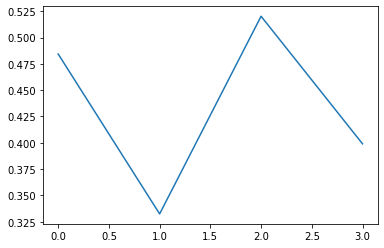

In [21]:
all_models, plt.plot(coherences)

# best results so far: bow_corpus, 10 topics, 2 passes

In [22]:
pyLDAvis.enable_notebook()
lda = all_models['Bow corpus, 2 passes, 10 topics']
vis = pyLDAvis.gensim.prepare(lda, bow_corpus, dictionary, mds='mmds')
vis

C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.264905 -0.337205       1        1  54.201996
4      0.028105 -0.445254       2        1  24.025588
9     -0.432750 -0.028585       3        1  10.306527
5     -0.260911  0.392294       4        1   5.880519
2      0.421975 -0.172440       5        1   4.201783
1      0.101697  0.118238       6        1   0.276718
6      0.101697  0.118238       7        1   0.276718
0      0.101697  0.118238       8        1   0.276718
8      0.101697  0.118238       9        1   0.276718
7      0.101697  0.118238      10        1   0.276718, topic_info=            Term         Freq        Total Category  logprob  loglift
50          food  4285.000000  4285.000000  Default   30.000  30.0000
96           one  4133.000000  4133.000000  Default   29.000  29.0000
104          tri  3898.000000  3898.000000  Default   28.000  28.0000
154        order  1999.000000  1999.000000  Default   27.000  27.0000
89           dog  3064.000000  3064.000000  Default   26.000  26.0000
...          ...          ...          ...      ...      ...      ...
4621    merchant     0.091793     1.024133  Topic10   -9.568   3.4779
12434    benecol     0.091793     1.198183  Topic10   -9.568   3.3209
2692      harrog     0.091793     1.023821  Topic10   -9.568   3.4782
14260  smoothist     0.091793     0.987812  Topic10   -9.568   3.5140
8590     airplan     0.091792     1.023586  Topic10   -9.568   3.4784

[1321 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1207      3  0.999037     abl
203       5  0.997338  almond
37        1  0.606679    also
37        2  0.356116    also
37        4  0.036893    also
...     ...       ...     ...
81        1  0.999843   would
167       1  0.567515    year
167       2  0.432519    year
1516      3  0.787637     yet
1516      5  0.211372     yet

[218 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 10, 6, 3, 2, 7, 1, 9, 8])

<h1 style="text-align: center; padding: 10px; border-bottom: 3px dashed black; border-top: 3px dashed black">NEGATIVE</h1>

In [23]:
all_models = {}
coherences = []

C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
stemmer = PorterStemmer()
corpus = []
for sent in neg[:num_instances]:
    # tokenize
    
    sent = nltk.word_tokenize(re.sub('[^a-zA-Z]',' ', sent.lower()))
    # stemming and remove stopwords and convert to lowercase
    sent = [stemmer.stem(word) for word in sent if word not in stopwords.words('english')]#and len(stemmer.stem(word))>2)
    # remove words less than 3 letters
    sent = [word for word in sent if len(word)>2]

#     corpus.append(' '.join(sent))
    corpus.append(sent)

C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
dictionary = gensim.corpora.Dictionary(corpus)

C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
bow_corpus = [dictionary.doc2bow(doc) for doc in corpus]

C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Do LDA on bag of words

In [28]:
start_time = time.time()

lda = gensim.models.LdaMulticore(bow_corpus, id2word=dictionary, num_topics=10, chunksize=1, passes=2)
model_description = 'Bow corpus, 2 passes, 10 topics'
all_models[model_description] = lda
coherences.append(get_coherence(lda))

for idx, topic in lda.print_topics(-1):
#     print('Topic: {} \nWords: {}'.format(idx, topic))
    print(topic)
    print('------------------------------------------------------------------------------------------------------------')
    
print(time.time() - start_time)

C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.102*"food" + 0.057*"box" + 0.047*"eat" + 0.040*"cat" + 0.026*"stuff" + 0.020*"come" + 0.013*"corn" + 0.012*"well" + 0.012*"made" + 0.012*"ingredi"
------------------------------------------------------------------------------------------------------------
0.068*"item" + 0.053*"green" + 0.049*"order" + 0.035*"pack" + 0.034*"regular" + 0.028*"com" + 0.027*"stale" + 0.021*"peanut" + 0.017*"http" + 0.016*"stomach"
------------------------------------------------------------------------------------------------------------
0.026*"product" + 0.020*"one" + 0.015*"tri" + 0.014*"good" + 0.013*"would" + 0.013*"amazon" + 0.013*"get" + 0.012*"like" + 0.011*"bag" + 0.011*"use"
------------------------------------------------------------------------------------------------------------
0.080*"buy" + 0.065*"dog" + 0.025*"mani" + 0.024*"treat" + 0.022*"chang" + 0.017*"anyth" + 0.015*"feed" + 0.014*"chew" + 0.014*"chicken" + 0.012*"new"
------------------------------------------------------------------

## Do LDA on TFIDF

In [29]:
start_time = time.time()

lda = gensim.models.LdaMulticore(corpus_tfidf, id2word=dictionary, num_topics=10, chunksize=1, passes=2)
model_description = 'Tfidf, 2 passes, 10 topics'
all_models[model_description] = lda
coherences.append(get_coherence(lda))

for idx, topic in lda.print_topics(-1):
#     print('Topic: {} \nWords: {}'.format(idx, topic))
    print(topic)
    print('------------------------------------------------------------------------------------------------------------')
    
print(time.time() - start_time)

C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.000*"que" + 0.000*"costa" + 0.000*"rican" + 0.000*"engeri" + 0.000*"para" + 0.000*"bonsay" + 0.000*"aspartim" + 0.000*"mayonnais" + 0.000*"tchibo" + 0.000*"aunt"
------------------------------------------------------------------------------------------------------------
0.000*"que" + 0.000*"costa" + 0.000*"rican" + 0.000*"engeri" + 0.000*"para" + 0.000*"bonsay" + 0.000*"aspartim" + 0.000*"mayonnais" + 0.000*"tchibo" + 0.000*"aunt"
------------------------------------------------------------------------------------------------------------
0.000*"que" + 0.000*"costa" + 0.000*"rican" + 0.000*"engeri" + 0.000*"para" + 0.000*"bonsay" + 0.000*"aspartim" + 0.000*"mayonnais" + 0.000*"tchibo" + 0.000*"aunt"
------------------------------------------------------------------------------------------------------------
0.023*"tea" + 0.021*"dog" + 0.018*"buy" + 0.018*"box" + 0.017*"amazon" + 0.015*"price" + 0.015*"pack" + 0.015*"get" + 0.014*"purchas" + 0.012*"brand"
-------------------------------

## Do LDA on bag of words with 4 passes

In [30]:
start_time = time.time()

lda = gensim.models.LdaMulticore(bow_corpus, id2word=dictionary, num_topics=10, chunksize=1, passes=4)
model_description = 'Bow corpus, 4 passes, 10 topics'
all_models[model_description] = lda
coherences.append(get_coherence(lda))

for idx, topic in lda.print_topics(-1):
#     print('Topic: {} \nWords: {}'.format(idx, topic))
    print(topic)
    print('------------------------------------------------------------------------------------------------------------')
    
print(time.time() - start_time)

C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.053*"green" + 0.029*"made" + 0.028*"pet" + 0.028*"star" + 0.024*"healthi" + 0.024*"china" + 0.023*"jerki" + 0.022*"entir" + 0.018*"caus" + 0.016*"sauc"
------------------------------------------------------------------------------------------------------------
0.067*"ingredi" + 0.044*"product" + 0.033*"corn" + 0.030*"contain" + 0.025*"com" + 0.025*"serv" + 0.024*"natur" + 0.019*"syrup" + 0.017*"health" + 0.016*"soy"
------------------------------------------------------------------------------------------------------------
0.000*"rican" + 0.000*"costa" + 0.000*"que" + 0.000*"para" + 0.000*"morel" + 0.000*"chestnut" + 0.000*"behold" + 0.000*"jake" + 0.000*"fatman" + 0.000*"couscou"
------------------------------------------------------------------------------------------------------------
0.000*"rican" + 0.000*"costa" + 0.000*"que" + 0.000*"para" + 0.000*"morel" + 0.000*"chestnut" + 0.000*"behold" + 0.000*"jake" + 0.000*"fatman" + 0.000*"couscou"
--------------------------------------

## Do LDA on bag of words with 2 passes and 15 topics

In [31]:
start_time = time.time()

lda = gensim.models.LdaMulticore(bow_corpus, id2word=dictionary, num_topics=15, chunksize=1, passes=2)
model_description = 'Bow corpus, 2 passes, 15 topics'
all_models[model_description] = lda
coherences.append(get_coherence(lda))

for idx, topic in lda.print_topics(-1):
#     print('Topic: {} \nWords: {}'.format(idx, topic))
    print(topic)
    print('------------------------------------------------------------------------------------------------------------')
    
print(time.time() - start_time)

C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.062*"buy" + 0.052*"dog" + 0.050*"good" + 0.040*"review" + 0.029*"think" + 0.028*"give" + 0.027*"smell" + 0.027*"way" + 0.024*"free" + 0.023*"littl"
------------------------------------------------------------------------------------------------------------
0.069*"amazon" + 0.061*"box" + 0.053*"product" + 0.041*"packag" + 0.040*"pack" + 0.035*"item" + 0.032*"differ" + 0.026*"open" + 0.026*"recommend" + 0.024*"ship"
------------------------------------------------------------------------------------------------------------
0.061*"like" + 0.060*"tast" + 0.037*"tri" + 0.034*"flavor" + 0.032*"coffe" + 0.028*"order" + 0.026*"one" + 0.026*"even" + 0.020*"make" + 0.018*"cup"
------------------------------------------------------------------------------------------------------------
0.086*"product" + 0.054*"ingredi" + 0.045*"natur" + 0.044*"contain" + 0.033*"organ" + 0.023*"origin" + 0.023*"gluten" + 0.020*"candi" + 0.020*"full" + 0.020*"cereal"
-----------------------------------------------

C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


({'Bow corpus, 2 passes, 10 topics': <gensim.models.ldamulticore.LdaMulticore at 0x2d3ee806970>,
  'Tfidf, 2 passes, 10 topics': <gensim.models.ldamulticore.LdaMulticore at 0x2d3ef8b7850>,
  'Bow corpus, 4 passes, 10 topics': <gensim.models.ldamulticore.LdaMulticore at 0x2d3ee806520>,
  'Bow corpus, 2 passes, 15 topics': <gensim.models.ldamulticore.LdaMulticore at 0x2d3ef8b7040>},
 [<matplotlib.lines.Line2D at 0x2d3f054d8e0>])

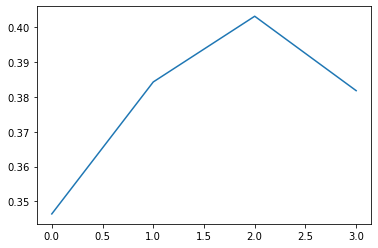

In [32]:
all_models, plt.plot(coherences)

# best results so far: bow_corpus, 10 topics, 2 passes

In [33]:
pyLDAvis.enable_notebook()
lda = all_models['Bow corpus, 2 passes, 10 topics']
# lda = all_models['Bow corpus, 2 passes, 15 topics']
vis = pyLDAvis.gensim.prepare(lda, bow_corpus, dictionary, mds='mmds')
vis

C:\ProgramData\Anaconda3\envs\AhmedEnv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.172127  0.392347       1        1  42.649406
5      0.178902 -0.425332       2        1  11.627143
9      0.206169  0.425580       3        1   9.292710
0     -0.241265 -0.387632       4        1   9.226308
3     -0.388837  0.191127       5        1   7.943523
7      0.062697  0.169966       6        1   5.583205
8      0.403957 -0.184769       7        1   5.035237
1     -0.412533 -0.103407       8        1   3.456276
6      0.390720  0.110808       9        1   3.266353
4     -0.027683 -0.188689      10        1   1.919840, topic_info=         Term         Freq        Total Category  logprob  loglift
15       tast  7222.000000  7222.000000  Default  30.0000  30.0000
28       food  5273.000000  5273.000000  Default  29.0000  29.0000
235       tea  3541.000000  3541.000000  Default  28.0000  28.0000
8        like  7218.000000  7218.000000  Default  27.0000  27.0000
237       buy  3500.000000  3500.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
4632   sprout    86.077911    87.017218  Topic10  -4.8138   3.9421
2428     user    82.466629    83.406188  Topic10  -4.8566   3.9416
1163  buffalo    80.492908    81.432157  Topic10  -4.8809   3.9413
2510     info    79.283087    80.222461  Topic10  -4.8960   3.9411
2056      tin    78.910941    79.850119  Topic10  -4.9007   3.9411

[433 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
471       7  0.995159  absolut
275       2  0.998721   actual
1172      1  0.010293      add
1172      2  0.388563      add
1172      7  0.599570      add
...     ...       ...      ...
19        3  0.219644    would
1103      5  0.994209    write
1583      8  0.996158      www
2716      9  0.992722    yeast
986       7  0.996137   yellow

[504 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 6, 10, 1, 4, 8, 9, 2, 7, 5])